In [1]:
!pip install numpy

In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
df = pd.read_csv('spam.csv' , encoding = 'latin-1')

In [7]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5384,ham,How are you babes. Hope your doing ok. I had a...,NaN,NaN,NaN
749,ham,By monday next week. Give me the full gist,NaN,NaN,NaN
2475,ham,Mm i am on the way to railway,NaN,NaN,NaN
2872,ham,I dont understand your message.,NaN,NaN,NaN
7592,spam,can jim come over and watch ?\r\nup to 80 %\r...,NaN,NaN,NaN


In [8]:
df.shape

(10743, 5)

In [9]:
# Stages
# Cleaning
# EDA
# Preprocessing
# model building
# eval
# website
# deploy

In [10]:
# Cleaning


In [11]:
df.drop( columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [12]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.rename(columns = {'v1' :'target','v2':'text'}, inplace = True)

In [14]:
df.sample(4)

,target,text
2164,ham,"Nothing really, just making sure everybody's u..."
5736,spam,oem software at cheap prices - fortnight\r\nl...
3219,ham,Its like that hotel dusk game i think. You sol...
1770,ham,Dont show yourself. How far. Put new pictures ...


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [16]:
df['target']=encoder.fit_transform(df['target'])

In [17]:
df.sample(5)

,target,text
7725,0,"hpl nom for january 16 , 2001\r\n( see attach..."
6004,1,63 . mortgage rates - as low as 2 . 93 % 9 ss...
4383,0,Thanks honey but still haven't heard anything ...
406,0,All was well until slightly disastrous class t...
9775,0,name change / merger listing for 7 / 00\r\nth...


In [18]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [19]:
df.duplicated().sum()

581

In [20]:
df.drop_duplicates(keep = 'first' , inplace = True)

In [22]:
df.info

<bound method DataFrame.info of        target                                               text
0           0  Go until jurong point, crazy.. Available only ...
1           0                      Ok lar... Joking wif u oni...
2           1  Free entry in 2 a wkly comp to win FA Cup fina...
3           0  U dun say so early hor... U c already then say...
4           0  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
10737       0   fw : crosstex energy , driscoll ranch # 1 , #...
10738       0   put the 10 on the ft\r\nthe transport volumes...
10739       0   3 / 4 / 2000 and following noms\r\nhpl can ' ...
10741       0   industrial worksheets for august 2000 activit...
10742       1   important online banking alert\r\ndear valued...

[10162 rows x 2 columns]>

In [23]:
df.duplicated().sum()

0

In [24]:
# EDA
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
df['target'].value_counts()

target
0    8047
1    2115
Name: count, dtype: int64

In [26]:
import matplotlib.pyplot as plt

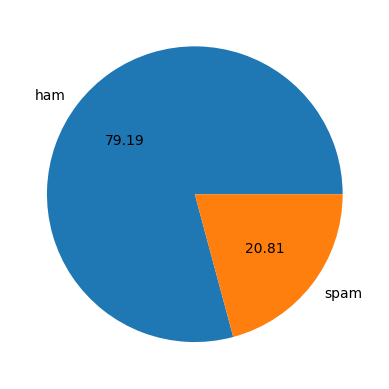

In [31]:
plt.pie(df['target'].value_counts() , labels = ['ham', 'spam'] ,autopct = '%0.2f')
plt.show()

In [32]:
import nltk

In [33]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
df['num_character']=df['text'].apply(len)

In [35]:
df.sample(4)

,target,text,num_character
5177,0,Very strange. and are watching the 2nd one n...,86
2087,0,\alright babe,13
5862,0,re : nom / vols for 3 / 24 thru 3 / 26 / 01\r...,567
9468,0,txu fuel co . nom . s for 2 / 20 / 01\r\n( se...,98


In [36]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [37]:
df['num_word']=df['text'].apply( lambda x: nltk.word_tokenize(x)).apply(len)

In [38]:
df

,target,text,num_character,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
10737,0,"fw : crosstex energy , driscoll ranch # 1 , #...",861,195
10738,0,put the 10 on the ft\r\nthe transport volumes...,526,154
10739,0,3 / 4 / 2000 and following noms\r\nhpl can ' ...,1106,304
10741,0,industrial worksheets for august 2000 activit...,565,110


In [39]:
df['num_sentence']=df['text'].apply( lambda x: nltk.sent_tokenize(x)).apply(len)

In [40]:
df

,target,text,num_character,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
10737,0,"fw : crosstex energy , driscoll ranch # 1 , #...",861,195,9
10738,0,put the 10 on the ft\r\nthe transport volumes...,526,154,7
10739,0,3 / 4 / 2000 and following noms\r\nhpl can ' ...,1106,304,13
10741,0,industrial worksheets for august 2000 activit...,565,110,20


In [41]:
df[['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,10162.000000,10162.000000,10162.000000
mean,561.694450,123.220527,7.577249
std,1191.658714,261.691005,20.438804
min,2.000000,0.000000,0.000000
25%,55.250000,14.000000,1.000000
50%,142.000000,30.500000,3.000000
75%,532.000000,120.000000,7.000000
max,32250.000000,8861.000000,1204.000000


In [43]:
df[df['target'] == 0 ][['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,8047.000000,8047.000000,8047.000000
mean,472.608053,109.882068,6.138934
std,1035.363196,246.858760,17.504968
min,2.000000,1.000000,1.000000
25%,47.000000,12.000000,1.000000
50%,104.000000,25.000000,2.000000
75%,426.000000,102.000000,6.000000
max,32250.000000,8861.000000,1204.000000


In [44]:
df[df['target'] == 1 ][['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,2115.000000,2115.000000,2115.000000
mean,900.643972,173.969740,13.049645
std,1612.562568,306.544391,28.351355
min,3.000000,0.000000,0.000000
25%,149.000000,29.000000,3.000000
50%,323.000000,65.000000,5.000000
75%,855.500000,172.000000,13.000000
max,22065.000000,3961.000000,693.000000


In [45]:
import seaborn as sns

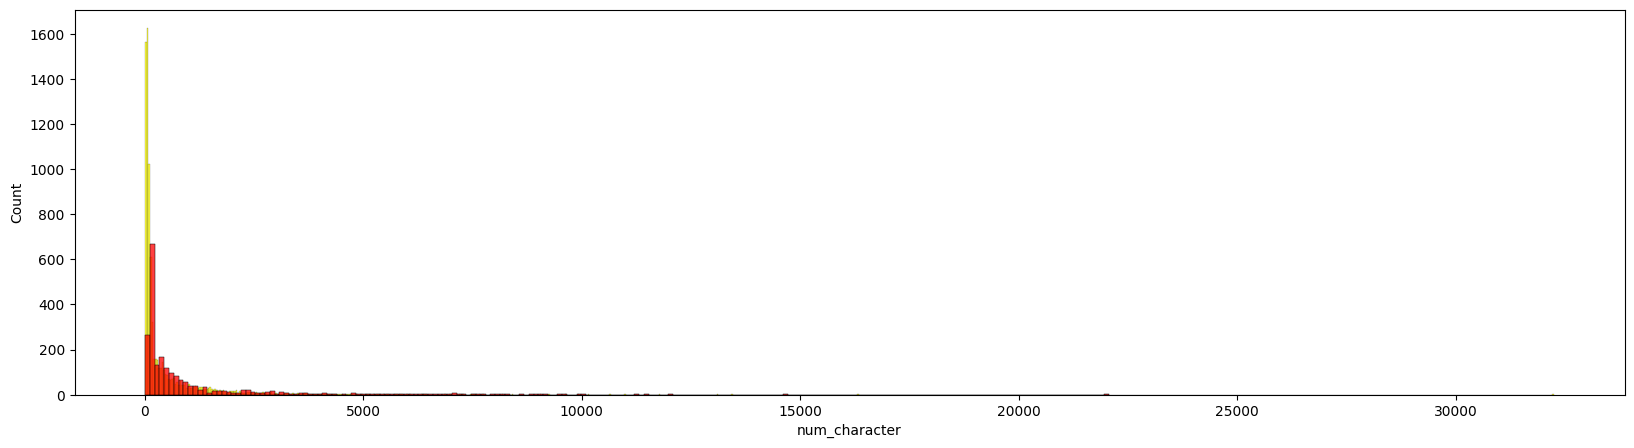

In [49]:
plt.figure(figsize=(20,5))
sns.histplot(df[df['target']==0]['num_character'], color = 'yellow')
sns.histplot(df[df['target']==1]['num_character'] , color = 'red')
plt.show()

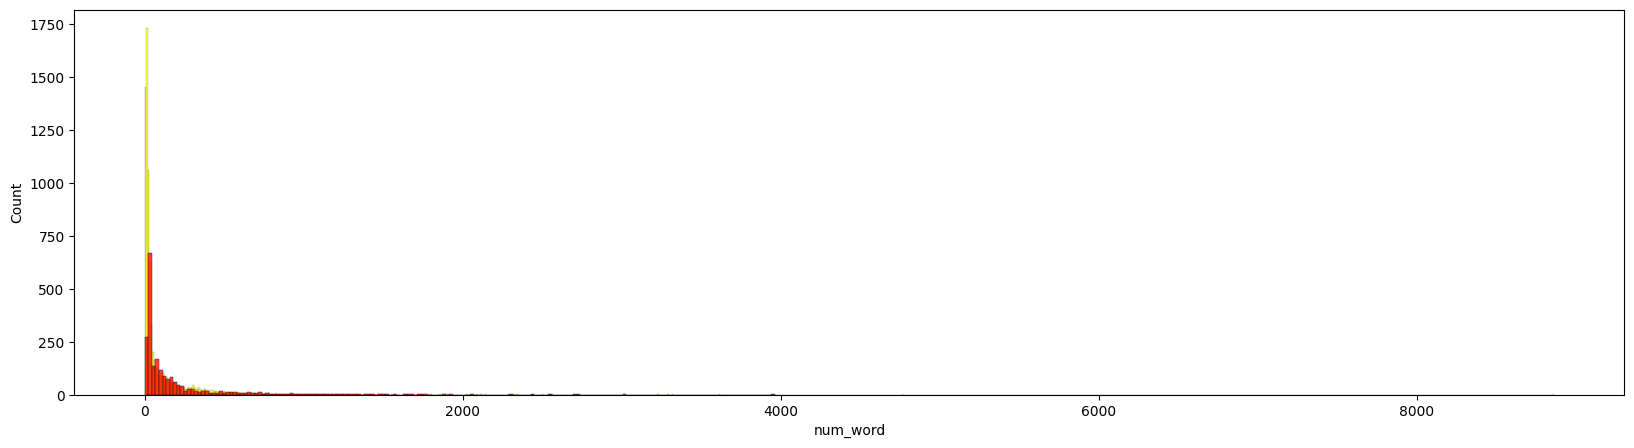

In [51]:
plt.figure(figsize=(20,5))
sns.histplot(df[df['target']==0]['num_word'], color = 'yellow')
sns.histplot(df[df['target']==1]['num_word'] , color = 'red')
plt.show()

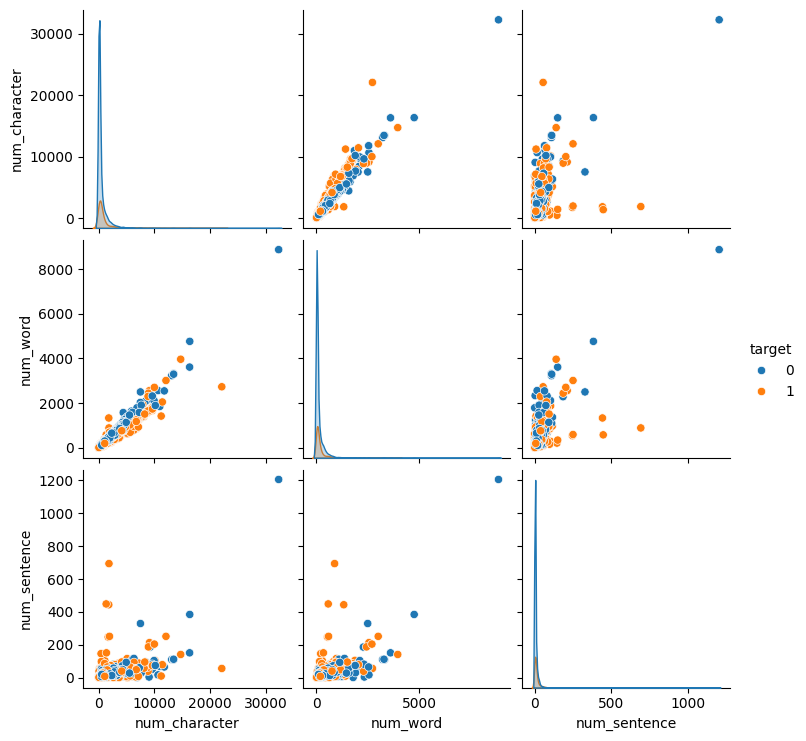

In [52]:
sns.pairplot(df,hue= ('target'))
plt.show()

<Axes: >

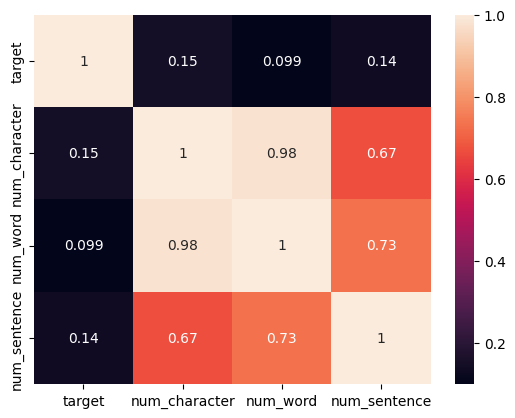

In [53]:
# correlation matrix
df_numeric = df.select_dtypes(include=[np.number]) 
sns.heatmap(df_numeric.corr() , annot = True)

In [54]:
# data Preprocessing


In [56]:
import string

In [63]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    
    text= nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and  i not in string.punctuation:
            y.append(i)
            
    text = y[:]       
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    
    return " ".join(y)

In [64]:
transform_text('HI Somu MY sely  Ak?!')

'hi somu seli ak'

In [65]:
from nltk.corpus import stopwords 

In [66]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [67]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [68]:
ps.stem('danceing')

'danc'

In [69]:
df['transform_text']=df['text'].apply(transform_text)

In [72]:
df#

,target,text,num_character,num_word,num_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
10737,0,"fw : crosstex energy , driscoll ranch # 1 , #...",861,195,9,fw crosstex energi driscol ranch 1 3 meter no ...
10738,0,put the 10 on the ft\r\nthe transport volumes...,526,154,7,put 10 ft transport volum decreas 25000 10000 ...
10739,0,3 / 4 / 2000 and following noms\r\nhpl can ' ...,1106,304,13,3 4 2000 follow nom hpl take extra 15 mmcf wee...
10741,0,industrial worksheets for august 2000 activit...,565,110,20,industri worksheet august 2000 activ attach wo...


In [75]:
# word cloud
!pip install WordCloud

In [76]:
from wordcloud import WordCloud
wc= WordCloud(width = 700 , height = 700 , min_font_size = 10 ,background_color = 'yellow')

In [77]:
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep = ' '))

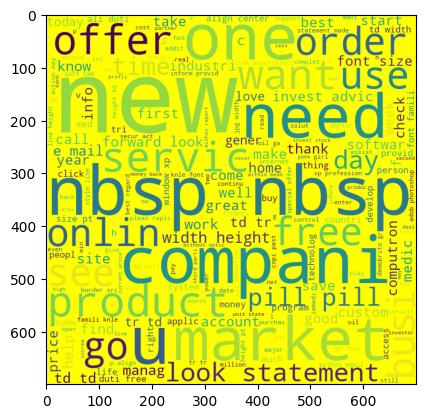

In [78]:
plt.imshow(spam_wc)

In [79]:
ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep = ' '))

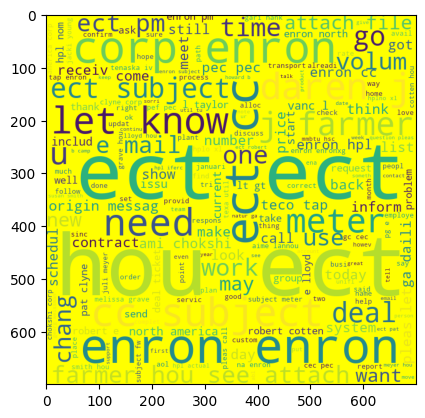

In [80]:
plt.imshow(ham_wc)

In [81]:
#top 50 

spam_corpus = []
for msg in df[df['target'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [82]:
len(spam_corpus)

205069

In [83]:
!pip install Counter

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for Counter: filename=Counter-1.0.0-py3-none-any.whl size=5425 sha256=4a7b7115f162cab5c100f02190dae46e6b50283f11f8459cebc3a9091b0f2ef0
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\08\5b\a0\8f15503db6a45a1d8747bf0f1438411cb37484ac4dfdfe6c0b
Successfully built Counter


In [84]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(50))

,0,1
0,3,1249
1,2,1008
2,http,999
3,com,989
4,compani,921
5,price,746
6,1,738
7,0,690
8,e,633
9,get,621


In [85]:
ham_corpus = []
for msg in df[df['target'] == 0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
    

In [86]:
len(ham_corpus)

412348

In [87]:
pd.DataFrame(Counter(ham_corpus).most_common(50))

,0,1
0,ect,13690
1,hou,7174
2,enron,6442
3,2000,4210
4,deal,3492
5,ga,2798
6,pleas,2749
7,com,2714
8,meter,2709
9,subject,2679


In [89]:
# Model Building
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [90]:
X = tfidf.fit_transform(df['transform_text']).toarray()

In [91]:
X.shape

(10162, 45520)

In [92]:
y = df['target'].values

In [93]:
y

array([0, 0, 1, ..., 0, 0, 1])

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 2 )

In [96]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB ,BernoulliNB
from sklearn.metrics import accuracy_score ,confusion_matrix, precision_score 

In [97]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [98]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8991637973438269
[[1488  136]
 [  69  340]]
0.7142857142857143


In [99]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.8908017707820954
[[1624    0]
 [ 222  187]]
1.0


In [100]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.8706345302508608
[[1585   39]
 [ 224  185]]
0.8258928571428571


In [102]:
pip install xgboost


   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 2.0 MB/s eta 0:00:49
   ---------------------------------------- 0.0/99.8 MB 2.0 MB/s eta 0:00:49
   ---------------------------------------- 0.0/99.8 MB 2.0 MB/s eta 0:00:49
   ---------------------------------------- 0.0/99.8 MB 2.0 MB/s eta 0:00:49
   ---------------------------------------- 0.0/99.8 MB 2.0 MB/s eta 0:00:49
   ---------------------------------------- 0.0/99.8 MB 2.0 MB/s eta 0:00:49
   ---------------------------------------- 0.0/99.8 MB 2.0 MB/s eta 0:00:49
   ---------------------------------------- 0.0/99.8 MB 2.0 MB/s eta 0:00:49
   ------------------------------

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier , ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [104]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [105]:
df['transform_text'][4532]

'gr8 new servic live sex video chat mob see sexiest dirtiest girl live ur phone 4 detail text horni 89070 cancel send stop 89070'

In [106]:
df.sample(10)

,target,text,num_character,num_word,num_sentence,transform_text
2654,0,Its sarcasm.. .nt scarcasim,27,5,1,sarcasm scarcasim
2559,0,I also thk too fast... Xy suggest one not me. ...,95,27,3,also thk fast xy suggest one u dun wan go 2 ra...
8410,0,spring savings certificate - take 30 % off\r\...,2084,386,31,spring save certif take 30 save 30 use custom ...
1829,1,Hottest pics straight to your phone!! See me g...,151,32,3,hottest pic straight phone see get wet want xx...
406,0,All was well until slightly disastrous class t...,168,36,3,well slightli disastr class pm fav darl hope d...
5777,0,pops production downtime request\r\nthe pops ...,1530,381,10,pop product downtim request pop product databa...
794,0,There generally isn't one. It's an uncountable...,94,21,3,gener one uncount noun u dictionari piec research
514,1,"You are guaranteed the latest Nokia Phone, a 4...",148,30,3,guarante latest nokia phone 40gb ipod mp3 play...
9189,0,gulf plains\r\nimbalance update : i spoke wit...,737,144,7,gulf plain imbal updat spoke mike bilberri con...
6942,0,entex noms - lone star katy\r\ntom -\r\ngiven...,235,49,3,entex nom lone star kati tom given difficulti ...
